In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
import joblib
import time
import matplotlib.pyplot as plt

In [ ]:
# Procesar los síntomas
df_symptoms = pd.read_csv('/content/df_Diseases_Symptoms_Processed.csv')

# Procesar los tratamientos
df_treatments = pd.read_csv('/content/df_Diseases_Treatments_Processed.csv')

# Mensaje final indicando que el proceso ha finalizado
print("Archivos procesados y guardados correctamente.")

Archivos procesados y guardados correctamente.


In [ ]:
df_symptoms.head()

,code,name,abdominal,abdominal cramps,abdominal distension,abdominal pain,abdominal pain (often in the upper right quadrant),abdominal swelling,abdominal swelling (ascites),abdominal tenderness,...,widespread musculoskeletal pain,with associated swelling,withdrawal symptoms (such as irritability;insomnia) when attempting to stop,withdrawal symptoms (such as nausea;muscle aches;anxiety) when attempting to stop,withdrawal symptoms (such as rebound anxiety;insomnia;tremors) when attempting to stop,withdrawal symptoms (such as tremors;anxiety;sweating) when attempting to stop,worsens with deep breaths,worthlessness,yellowing of the skin,yellowish
0,1,panic disorder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,vocal cord polyp,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,turner syndrome,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,cryptorchidism,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,ethylene glycol poisoning-1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_treatments.head()

,code,name,abscess,accommodations,acidic foods,activated charcoal (if indicated),activated charcoal administration,acupuncture,address underlying causes. it may include: lifestyle modifications (e.g.;avoiding alcohol;maintaining a healthy diet),addressing any medical complications,...,weight management,which can be done in the early stages of pregnancy. surgical abortion: a healthcare professional performs a procedure to remove the pregnancy,which can involve suction aspiration,wigs,wound care,wound care (cleaning;dressing changes),wound debridement (if necessary),wound dressings,wrist splints,x-ray
0,1,panic disorder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,vocal cord polyp,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,turner syndrome,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,cryptorchidism,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,ethylene glycol poisoning-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convertimos nombres de columnas a minúsculas antes de entrenar
df_symptoms.columns = [col.lower() for col in df_symptoms.columns]

# Preparar X e y
y = df_symptoms[["name"]]  # "name" también está en minúsculas
X = df_symptoms.drop(columns=["code", "name"])  # "code" y "name" ahora en minúsculas

# Codificar enfermedades de forma binaria
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y.apply(lambda x: [x["name"]], axis=1))

# Guardar el codificador
joblib.dump(mlb, "label_binarizer.pkl")

# Dividir datos en entrenamiento y prueba
X_train, y_train = X, y_encoded

# Definir la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='sigmoid')  # Activación sigmoide para predicciones independientes
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Medir tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=32)

end_time = time.time()
training_time = end_time - start_time

print(f"Entrenamiento completado en {training_time:.2f} segundos")

# Guardar el modelo
model.save("disease_nn_model.h5")
print("Modelo entrenado y guardado correctamente.")



Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.6868   
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6244 
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4275 
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0022 - loss: 0.1410     
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0403 
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0282 
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0037 - loss: 0.0260     
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0042 - loss: 0.0247     
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0245 
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0018 - loss: 0.0234     
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0230 
Epoch 

Entrenamiento completado en 43.65 segundos
Modelo entrenado y guardado correctamente.


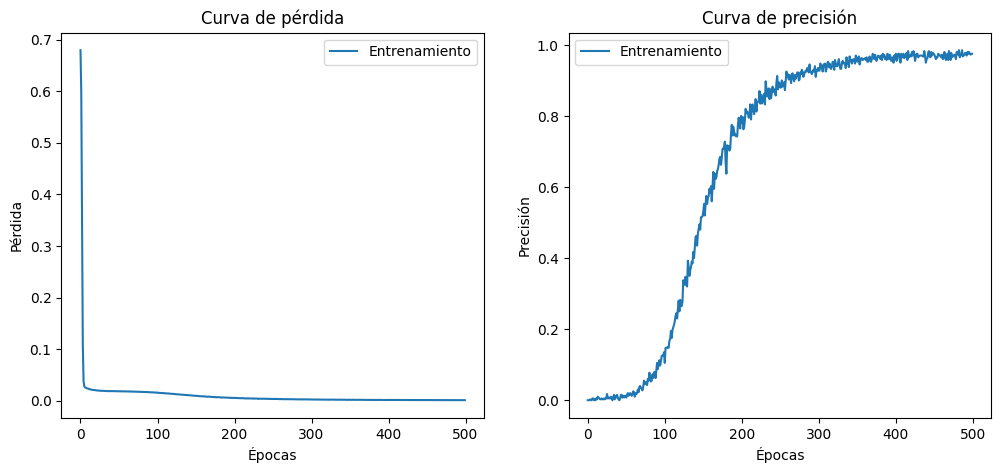

In [ ]:
# Función para graficar Underfitting y Overfitting
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Curva de pérdida')

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Curva de precisión')

    plt.show()

# Mostrar las curvas
plot_history(history)


In [ ]:
def predict_all_diseases_with_treatments(symptom_input):
    # Convertimos los síntomas de entrada a minúsculas
    symptom_input = [symptom.lower() for symptom in symptom_input]

    # Nos aseguramos de que los nombres de las columnas también estén en minúsculas
    X.columns = [col.lower() for col in X.columns]

    # Creamos el vector de síntomas sin importar mayúsculas o minúsculas
    symptom_vector = np.array([[1 if symptom in symptom_input else 0 for symptom in X.columns]])

    probabilities = model.predict(symptom_vector)[0]
    disease_probabilities = {mlb.classes_[i]: prob for i, prob in enumerate(probabilities)}
    sorted_diseases = sorted(disease_probabilities.items(), key=lambda x: x[1], reverse=True)

    results = []
    for disease, probability in sorted_diseases:
        if probability >= 0.01:  # Umbral del 1%
            treatment_row = df_treatments[df_treatments['name'] == disease]  # 'name' en minúsculas
            if not treatment_row.empty:
                treatments = [col for col in df_treatments.columns[3:] if treatment_row.iloc[0][col] == 1]
                treatments = treatments if treatments else ["No hay tratamientos disponibles"]
            else:
                treatments = ["No hay tratamientos disponibles"]
            results.append((disease, probability, treatments))

    return results


# Ejemplo de predicción
symptom_example = ["Anxiety", "Shortness of Breath", "sweating", "trembling"]
predictions = predict_all_diseases_with_treatments(symptom_example)

print("Enfermedades predichas con tratamientos:")
for disease, probability, treatments in predictions:
    print(f"{disease}: {probability:.2%}")
    print(f"Tratamientos: {', '.join(treatments)}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Enfermedades predichas con tratamientos:
panic disorder: 68.62%
Tratamientos: antidepressant medications, behavioral therapy, cognitive behavioral therapy, medication, medications, relaxation techniques, therapy

